In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q1

In [2]:
df=pd.read_csv('C:/Users/Sayan/Downloads/Election_Data (1).csv')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df1=df.drop('Unnamed: 0',axis=1)

In [5]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
df1.columns=['Vote','Age','Economic_cond_national','Economic_cond_household','Blair','Hague','Europe','Political_knowledge','Gender']

In [7]:
df1.head()

,Vote,Age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,Gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Vote                     1525 non-null   object
 1   Age                      1525 non-null   int64 
 2   Economic_cond_national   1525 non-null   int64 
 3   Economic_cond_household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   Political_knowledge      1525 non-null   int64 
 8   Gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
df1.describe()

,Age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [10]:
df1.isnull().sum()

Vote                       0
Age                        0
Economic_cond_national     0
Economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
Political_knowledge        0
Gender                     0
dtype: int64

In [11]:
duplicate=df1[df1.duplicated()]
duplicate

,Vote,Age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,Gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [12]:
df2=df1.drop_duplicates()

In [13]:
df2.duplicated().sum()

0

In [14]:
from scipy.stats import skew

In [15]:
df3=df2.drop(['Vote','Gender'],axis=1)

In [16]:
df3.head()

,Age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge
0,43,3,3,4,1,2,2
1,36,4,4,4,4,5,2
2,35,4,4,5,2,3,2
3,24,4,2,2,1,4,0
4,41,2,2,1,1,6,2


In [17]:
skew_value=df3.skew(axis=0)

In [18]:
print(skew_value)

Age                        0.139800
Economic_cond_national    -0.238474
Economic_cond_household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
Political_knowledge       -0.422928
dtype: float64


In [19]:
feature_list=['Age','Economic_cond_national','Economic_cond_household','Blair','Hague','Europe','Political_knowledge']

C:\Users\Sayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

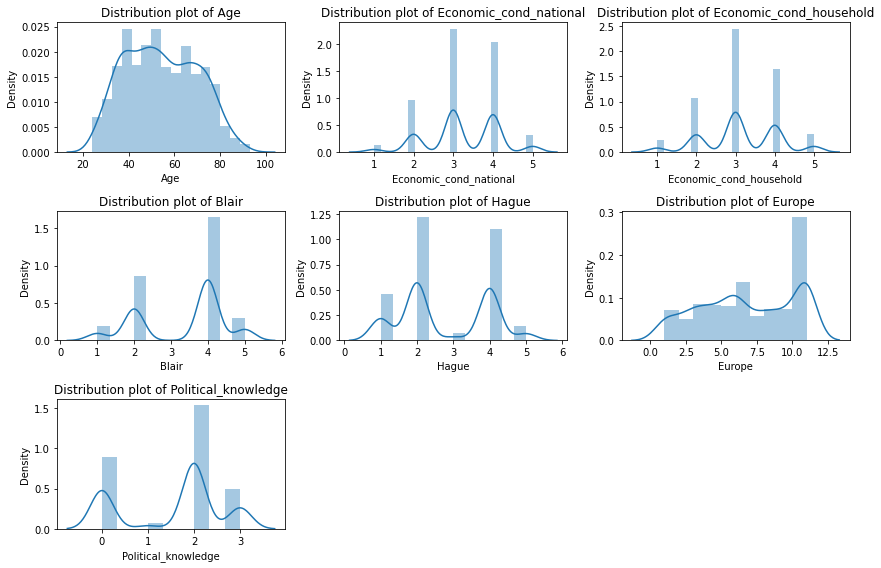

In [20]:
plt.figure(figsize=(12,8))
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.distplot(df3[feature_list[i]])
    plt.title('Distribution plot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [21]:
feature_list_1=['Vote','Gender']

C:\Users\Sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


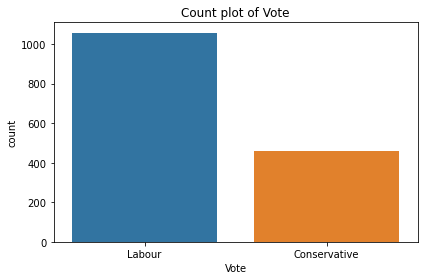

In [22]:
sns.countplot(df2[feature_list_1[0]])
plt.title('Count plot of {}'.format(feature_list_1[0]))
plt.tight_layout()

In [23]:
df2['Vote'].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: Vote, dtype: float64

Text(0.5, 1.0, 'Age vs Blair(count)')

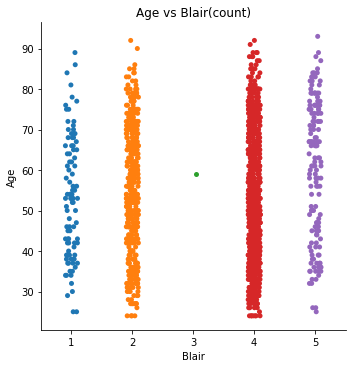

In [24]:
sns.catplot(data=df3,y='Age',x='Blair',kind='strip')
plt.title('Age vs Blair(count)')

Text(0.5, 1.0, 'Age vs Hague(count)')

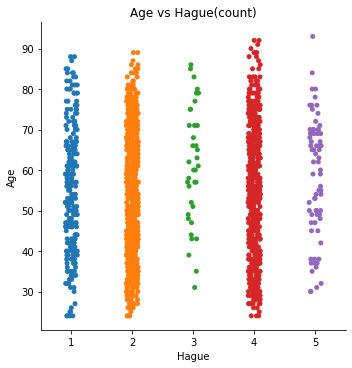

In [25]:
sns.catplot(data=df3,y='Age',x='Hague',kind='strip')
plt.title('Age vs Hague(count)')

Text(0.5, 1.0, 'Count plot of Hague')

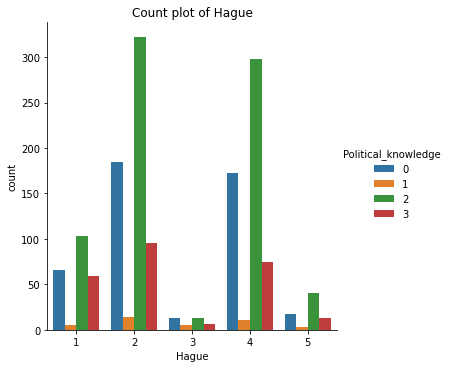

In [27]:
sns.catplot(data=df2,hue='Political_knowledge',x='Hague',kind='count')
plt.title('Count plot of Hague')

Text(0.5, 1.0, 'Count plot of Blair')

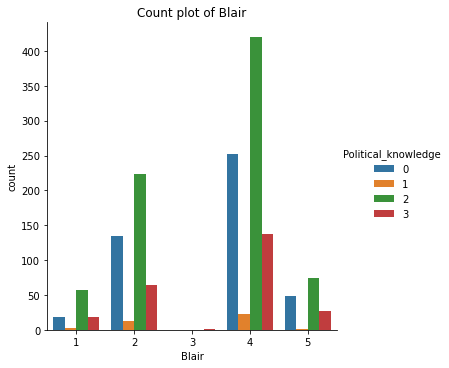

In [28]:
sns.catplot(data=df2,hue='Political_knowledge',x='Blair',kind='count')
plt.title('Count plot of Blair')

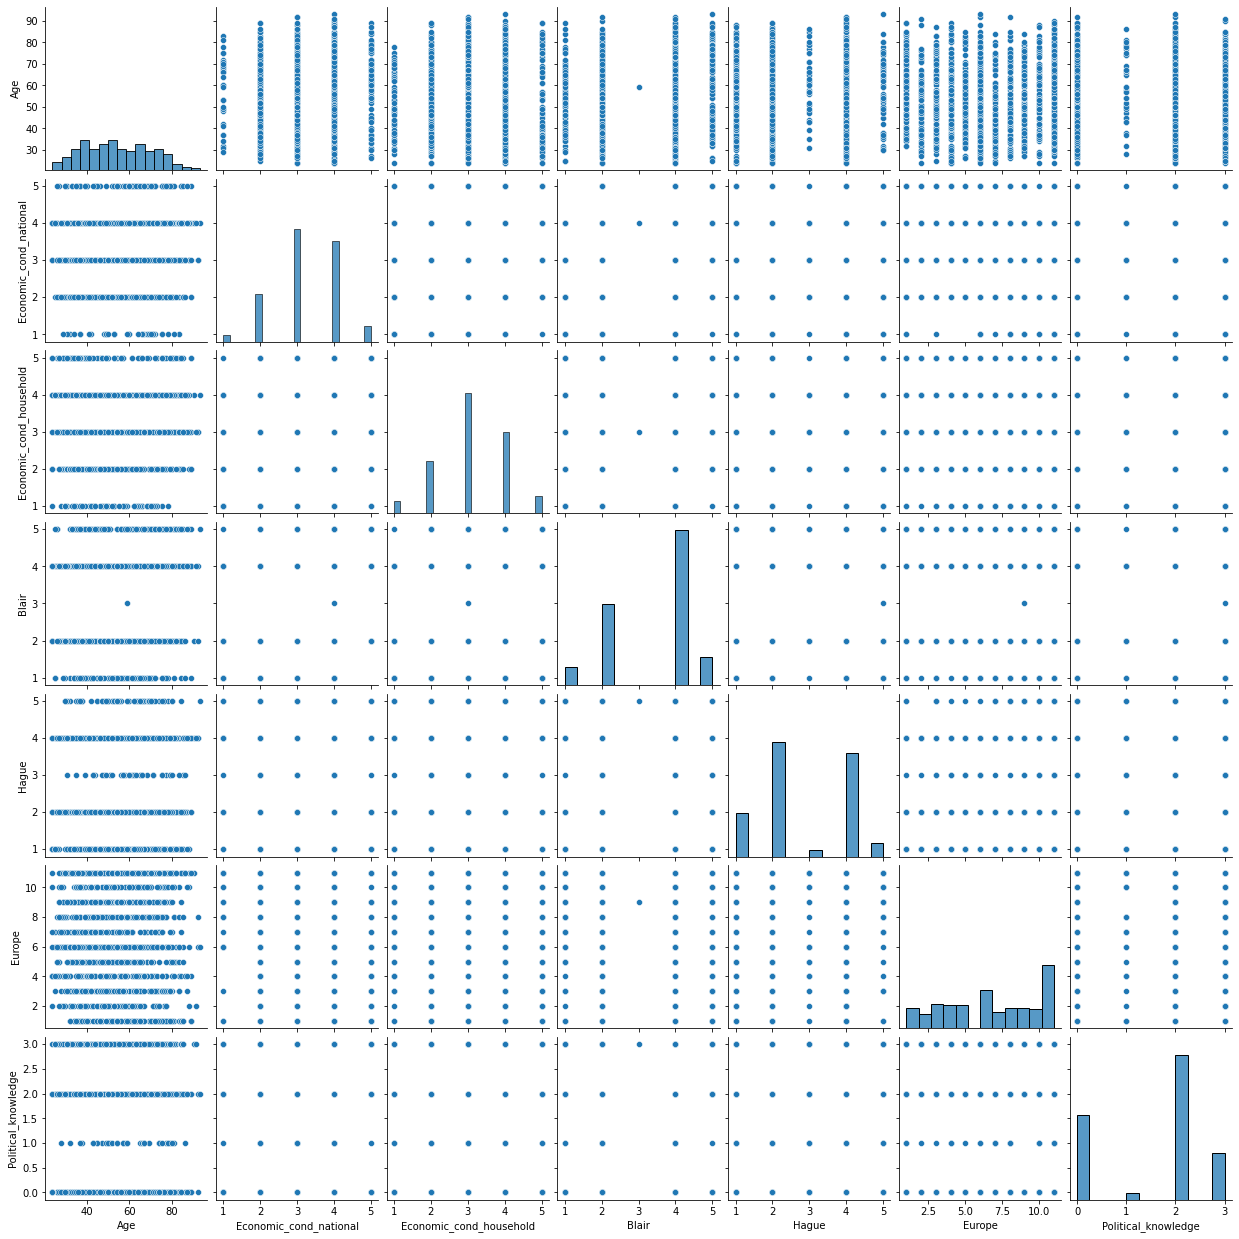

In [29]:
sns.pairplot(data=df2)

<AxesSubplot:>

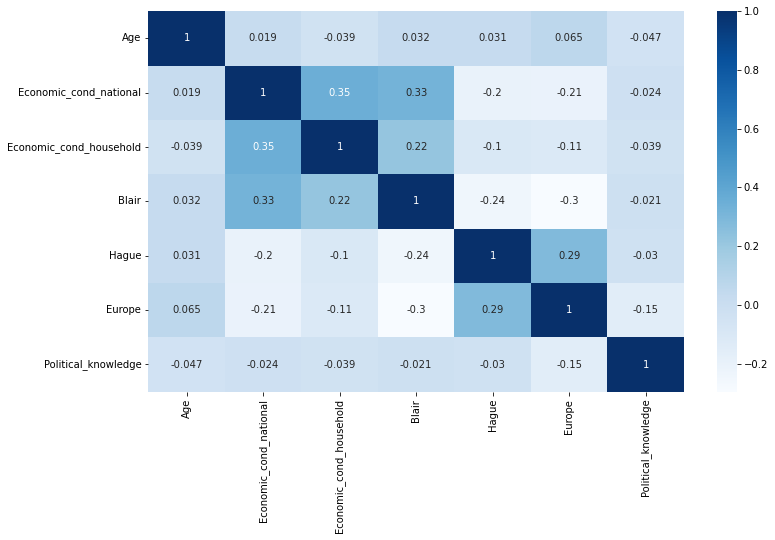

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(df3.corr(),annot=True,cmap='Blues')

C:\Users\Sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sayan\anaconda3\lib\si

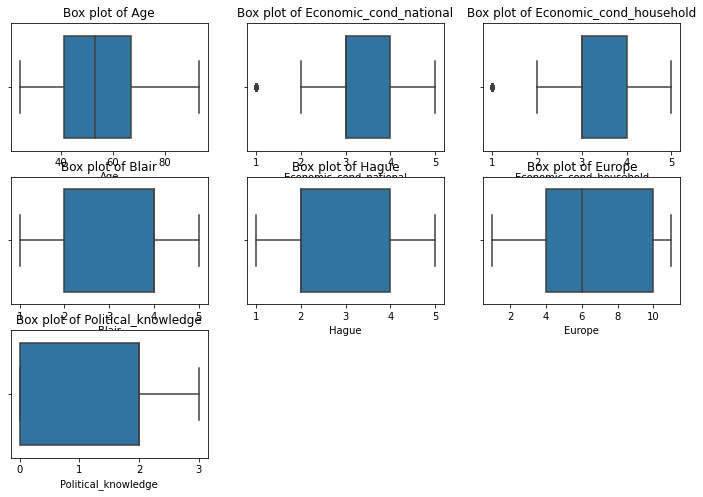

In [31]:
plt.figure(figsize=(12,8))
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df3[feature_list[i]])
    plt.title('Box plot of {}'.format(feature_list[i]))

In [32]:
df4=pd.get_dummies(data=df2,drop_first=True)
df4.head()

,Age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,Vote_Labour,Gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [33]:
X=df4.drop('Vote_Labour',axis=1)

In [34]:
y=df4.pop('Vote_Labour')

In [35]:
X.head()

,Age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,Gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [36]:
import scipy.stats as stats

In [37]:
X['Age']=stats.zscore(X['Age'])

In [38]:
X.head()

,Age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,Gender_male
0,-0.716161,3,3,4,1,2,2,0
1,-1.162118,4,4,4,4,5,2,1
2,-1.225827,4,4,5,2,3,2,1
3,-1.926617,4,2,2,1,4,0,0
4,-0.843577,2,2,1,1,6,2,1


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [41]:
X_train.shape

(1061, 8)

In [42]:
X_test.shape

(456, 8)

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [45]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict_test=model.predict(X_test)
model_score_test=model.score(X_test,y_test)
print(model_score_test)
print(metrics.confusion_matrix(y_test,y_predict_test))
print(metrics.classification_report(y_test,y_predict_test))

0.8355263157894737
[[113  40]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



In [46]:
y_predict_prob_test=model.predict_proba(X_test)
prob=pd.DataFrame(y_predict_prob_test)
prob.columns=['Conservative Party','Labour Party']
prob

,Conservative Party,Labour Party
0,0.423172,0.576828
1,0.150181,0.849819
2,0.007374,0.992626
3,0.833312,0.166688
4,0.070138,0.929862
...,...,...
451,0.043328,0.956672
452,0.584453,0.415547
453,0.041100,0.958900
454,0.067404,0.932596


In [47]:
y_predict_train=model.predict(X_train)
model_score_train=model.score(X_train,y_train)
print(model_score_train)
print(metrics.confusion_matrix(y_train,y_predict_train))
print(metrics.classification_report(y_train,y_predict_train))

0.8312912346842601
[[196 111]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [49]:
parameter_grid=[{'penalty':['l1','l2','elaticnet','none'],'C':np.logspace(-4,4,20),'solver':['lbfgs','newton_cg','liblinear','sag','saga'],'max_iter':[100,1000,2500,5000]}]

In [50]:
from sklearn.model_selection import GridSearchCV

In [52]:
regularized_model=GridSearchCV(model,param_grid=parameter_grid,cv=3,verbose=True,n_jobs=-1)

In [53]:
regularized_model=regularized_model.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\Sayan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.2893493  ...        nan 0.83128738 0.83128738]
  warnings.warn(
C:\Users\Sayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [55]:
LR=regularized_model.best_params_
LR

{'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [57]:
new_model=LogisticRegression(C=0.23357214690901212, max_iter=100, penalty='l1', solver='saga')
new_model=new_model.fit(X_train,y_train)
new_model.score(X_train,y_train)

C:\Users\Sayan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.8331762488218661

In [58]:
new_model.score(X_test,y_test)

0.8245614035087719

In [60]:
y_predict_train_LR=new_model.predict(X_train)
model_score_train_LR=new_model.score(X_train,y_train)
print(model_score_train_LR)
print(metrics.confusion_matrix(y_train,y_predict_train_LR))
print(metrics.classification_report(y_train,y_predict_train_LR))

0.8331762488218661
[[195 112]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [61]:
y_predict_test_LR=new_model.predict(X_test)
model_score_test_LR=new_model.score(X_test,y_test)
print(model_score_test_LR)
print(metrics.confusion_matrix(y_test,y_predict_test_LR))
print(metrics.classification_report(y_test,y_predict_test_LR))

0.8245614035087719
[[109  44]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



0.8895100182306742


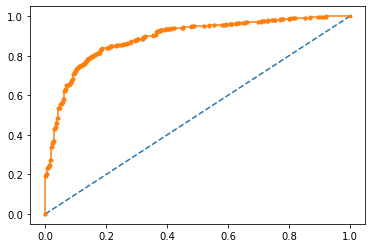

In [67]:
probs=new_model.predict_proba(X_train)
probs=probs[:,1]
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_train,probs)
print(auc)
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

0.882913781574236


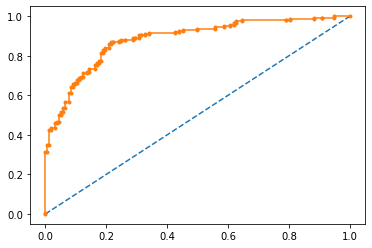

In [68]:
probs=new_model.predict_proba(X_test)
probs=probs[:,1]
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,probs)
print(auc)
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

In [70]:
new_model.coef_

array([[-0.20127627,  0.59804918,  0.04105344,  0.58440831, -0.79032622,
        -0.20756762, -0.27943391,  0.05623574]])

## LDA

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [72]:
lda=LinearDiscriminantAnalysis()
model_1=lda.fit(X_train,y_train)
model_1

LinearDiscriminantAnalysis()

In [73]:
y_predict_train_1=model_1.predict(X_train)
model_score_train_1=model_1.score(X_train,y_train)
print(model_score_train_1)
print(metrics.confusion_matrix(y_train,y_predict_train_1))
print(metrics.classification_report(y_train,y_predict_train_1))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [74]:
y_predict_test_1=model_1.predict(X_test)
model_score_test_1=model_1.score(X_test,y_test)
print(model_score_test_1)
print(metrics.confusion_matrix(y_test,y_predict_test_1))
print(metrics.classification_report(y_test,y_predict_test_1))

0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [76]:
y_predict_prob_test_1=model_1.predict_proba(X_test)
prob_1=pd.DataFrame(y_predict_prob_test_1)
prob_1.columns=['Consevative Party','Labour Party']
prob_1

,Consevative Party,Labour Party
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455
...,...,...
451,0.030702,0.969298
452,0.608446,0.391554
453,0.028453,0.971547
454,0.046719,0.953281


In [77]:
parameter_grid_1=[{'solver':['svd','lsqr','eigen'],'shrinkage':['auto','none']}]

In [78]:
regularized_model_1=GridSearchCV(model_1,param_grid=parameter_grid_1,cv=3,verbose=True,n_jobs=-1)

In [79]:
regularized_model_1=regularized_model_1.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\Sayan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.82845985 0.82845985        nan        nan        nan]
  warnings.warn(


In [80]:
regularized_model_1.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr'}

In [81]:
new_model_1=LinearDiscriminantAnalysis(shrinkage='auto',solver='lsqr')
new_model_1=new_model_1.fit(X_train,y_train)
new_model_1.score(X_train,y_train)

0.8331762488218661

In [82]:
new_model_1.score(X_test,y_test)

0.8355263157894737

In [83]:
y_predict_train_LDA=new_model_1.predict(X_train)
model_score_train_LDA=new_model_1.score(X_train,y_train)
print(model_score_train_LDA)
print(metrics.confusion_matrix(y_train,y_predict_train_LDA))
print(metrics.classification_report(y_train,y_predict_train_LDA))

0.8331762488218661
[[200 107]
 [ 70 684]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [84]:
y_predict_test_LDA=new_model_1.predict(X_test)
model_score_test_LDA=new_model_1.score(X_test,y_test)
print(model_score_test_LDA)
print(metrics.confusion_matrix(y_test,y_predict_test_LDA))
print(metrics.classification_report(y_test,y_predict_test_LDA))

0.8355263157894737
[[113  40]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



0.8896050596600973


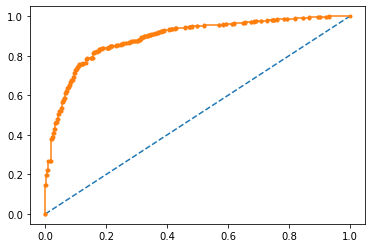

In [85]:
probs=new_model_1.predict_proba(X_train)
probs=probs[:,1]
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_train,probs)
print(auc)
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

0.88694751828124


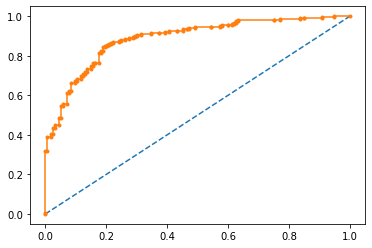

In [86]:
probs=new_model_1.predict_proba(X_test)
probs=probs[:,1]
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,probs)
print(auc)
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
model_2=KNeighborsClassifier(n_neighbors=5,weights='distance')
model_2.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [90]:
y_predict_test_2=model_2.predict(X_test)
model_score_test_2=model_2.score(X_test,y_test)
print(model_score_test_2)
print(metrics.confusion_matrix(y_test,y_predict_test_2))
print(metrics.classification_report(y_test,y_predict_test_2))

0.8135964912280702
[[100  53]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       153
           1       0.84      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



In [91]:
y_predict_train_2=model_2.predict(X_train)
model_score_train_2=model_2.score(X_train,y_train)
print(model_score_train_2)
print(metrics.confusion_matrix(y_train,y_predict_train_2))
print(metrics.classification_report(y_train,y_predict_train_2))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [92]:
y_predict_prob_test_2=model_2.predict_proba(X_test)
prob_2=pd.DataFrame(y_predict_prob_test_1)
prob_2.columns=['Consevative Party','Labour Party']
prob_2

,Consevative Party,Labour Party
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455
...,...,...
451,0.030702,0.969298
452,0.608446,0.391554
453,0.028453,0.971547
454,0.046719,0.953281


In [93]:
parameter_grid_2=[{'n_neighbors':[3,5],'weights':['uniform','distance']}]

In [94]:
regularized_model_2=GridSearchCV(model_2,param_grid=parameter_grid_2,cv=3,verbose=True,n_jobs=-1)

In [95]:
regularized_model_2=regularized_model_2.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [96]:
regularized_model_2.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [97]:
new_model_2=KNeighborsClassifier(n_neighbors=5,weights='uniform')
new_model_2.fit(X_train,y_train)
new_model_2.score(X_train,y_train)

0.8614514608859567

In [98]:
new_model_2.score(X_test,y_test)

0.8223684210526315

## Naive Bayes Model

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
model_3=GaussianNB()
model_3.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_predict_test_3=model_3.predict(X_test)
model_score_test_3=model_3.score(X_test,y_test)
print(model_score_test_3)
print(metrics.confusion_matrix(y_test,y_predict_test_3))
print(metrics.classification_report(y_test,y_predict_test_3))

In [ ]:
y_predict_train_3=model_3.predict(X_train)
model_score_train_3=model_3.score(X_train,y_train)
print(model_score_train_3)
print(metrics.confusion_matrix(y_train,y_predict_train_3))
print(metrics.classification_report(y_train,y_predict_train_3))

In [103]:
y_predict_prob_test_3=model_3.predict_proba(X_test)
prob_3=pd.DataFrame(y_predict_prob_test_3)
prob_3.columns=['Consevative Party','Labour Party']
prob_3

,Consevative Party,Labour Party
0,0.536792,0.463208
1,0.120285,0.879715
2,0.000332,0.999668
3,0.945240,0.054760
4,0.039267,0.960733
...,...,...
451,0.041463,0.958537
452,0.869567,0.130433
453,0.014916,0.985084
454,0.040028,0.959972


## Bagging

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=50,random_state=1,max_features=3)
rfcl=rfcl.fit(X_train,y_train)

In [106]:
y_predict_test_rfcl=rfcl.predict(X_test)
print(rfcl.score(X_test,y_test))

0.8355263157894737


In [107]:
y_predict_test_prob_rfcl=rfcl.predict_proba(X_test)
y_predict_test_prob_rfcl=pd.DataFrame(y_predict_test_prob_rfcl)
y_predict_test_prob_rfcl.columns=['Consevative Party','Labour Party']
y_predict_test_prob_rfcl

,Consevative Party,Labour Party
0,0.68,0.32
1,0.30,0.70
2,0.02,0.98
3,0.74,0.26
4,0.04,0.96
...,...,...
451,0.08,0.92
452,0.66,0.34
453,0.10,0.90
454,0.00,1.00


In [109]:
y_predict_train_rfcl=rfcl.predict(X_train)
print(rfcl.score(X_train,y_train))

1.0


## Boosting

## Ada Boosting

In [110]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(n_estimators=50,random_state=1)
abcl=abcl.fit(X_train,y_train)

In [111]:
y_predict_test_abcl=abcl.predict(X_test)
print(abcl.score(X_test,y_test))

0.8135964912280702


In [112]:
y_predict_test_prob_abcl=abcl.predict_proba(X_test)
y_predict_test_prob_abcl=pd.DataFrame(y_predict_test_prob_abcl)
y_predict_test_prob_abcl.columns=['Consevative Party','Labour Party']
y_predict_test_prob_abcl

,Consevative Party,Labour Party
0,0.504202,0.495798
1,0.493669,0.506331
2,0.462238,0.537762
3,0.511862,0.488138
4,0.489373,0.510627
...,...,...
451,0.486221,0.513779
452,0.495009,0.504991
453,0.492160,0.507840
454,0.483767,0.516233


In [113]:
y_predict_train_abcl=abcl.predict(X_train)
print(abcl.score(X_train,y_train))

0.8463713477851084


## Gradient Boosting

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=50,random_state=1)
gbcl=gbcl.fit(X_train,y_train)

In [115]:
y_predict_test_gbcl=gbcl.predict(X_test)
print(gbcl.score(X_test,y_test))

0.8289473684210527


In [116]:
y_predict_test_prob_gbcl=gbcl.predict_proba(X_test)
y_predict_test_prob_gbcl=pd.DataFrame(y_predict_test_prob_gbcl)
y_predict_test_prob_gbcl.columns=['Consevative Party','Labour Party']
y_predict_test_prob_gbcl

,Consevative Party,Labour Party
0,0.627549,0.372451
1,0.242376,0.757624
2,0.012862,0.987138
3,0.814551,0.185449
4,0.148756,0.851244
...,...,...
451,0.071745,0.928255
452,0.584943,0.415057
453,0.090746,0.909254
454,0.033861,0.966139


In [117]:
y_predict_train_gbcl=gbcl.predict(X_train)
print(gbcl.score(X_train,y_train))

0.8803016022620169


# Q2

In [118]:
import nltk
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [119]:
from nltk.corpus import inaugural

In [120]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [122]:
x=int((1941-1789)/4)
inaugural.raw(inaugural.fileids()[x])

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [123]:
len(inaugural.words(inaugural.fileids()[x]))

1536

In [124]:
u=int((1961-1789)/4)
len(inaugural.words(inaugural.fileids()[u]))

1546

In [125]:
z=int((1973-1789)/4)
len(inaugural.words(inaugural.fileids()[z]))

2028

In [131]:
inaugural.sents(inaugural.fileids()[x])[0]

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States',
 '.']

In [132]:
inaugural.sents(inaugural.fileids()[u])[0]

['Vice',
 'President',
 'Johnson',
 ',',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'Chief',
 'Justice',
 ',',
 'President',
 'Eisenhower',
 ',',
 'Vice',
 'President',
 'Nixon',
 ',',
 'President',
 'Truman',
 ',',
 'reverend',
 'clergy',
 ',',
 'fellow',
 'citizens',
 ',',
 'we',
 'observe',
 'today',
 'not',
 'a',
 'victory',
 'of',
 'party',
 ',',
 'but',
 'a',
 'celebration',
 'of',
 'freedom',
 '--',
 'symbolizing',
 'an',
 'end',
 ',',
 'as',
 'well',
 'as',
 'a',
 'beginning',
 '--',
 'signifying',
 'renewal',
 ',',
 'as',
 'well',
 'as',
 'change',
 '.']

In [133]:
inaugural.sents(inaugural.fileids()[z])[0]

['Mr',
 '.',
 'Vice',
 'President',
 ',',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'Chief',
 'Justice',
 ',',
 'Senator',
 'Cook',
 ',',
 'Mrs',
 '.',
 'Eisenhower',
 ',',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 ':']

In [134]:
len(inaugural.raw(inaugural.fileids()[x]))

7571

In [136]:
len(inaugural.raw(inaugural.fileids()[u]))

7618

In [137]:
len(inaugural.raw(inaugural.fileids()[z]))

9991

In [138]:
sample_sent=[]
for words in inaugural.sents(inaugural.fileids()[x])[0]:
    word=words.lower()
    sample_sent.append(word)
print(sample_sent)

['on', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'united', 'states', '.']


In [139]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [140]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [141]:
sample_sent_clean=[]
for w in inaugural.sents(inaugural.fileids()[x])[0]:
    if w not in stopwords:
        sample_sent_clean.append(w)
print(sample_sent_clean)

['On', 'national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'United', 'States']


In [142]:
all_words_1=[]
def Lower(p):
    for words in p.words(p.fileids()[x]):
        word=words.lower()
        all_words_1.append(word)
Lower(inaugural)

In [143]:
all_words_clean_1=[]
def clean(p):
    for w in p:
        if w not in stopwords:
            all_words_clean_1.append(w)
clean(all_words_1)
len(all_words_clean_1)

657

In [144]:
all_words_2=[]
def Lower(p):
    for words in p.words(p.fileids()[u]):
        word=words.lower()
        all_words_2.append(word)
Lower(inaugural)

In [146]:
all_words_clean_2=[]
def clean(p):
    for w in p:
        if w not in stopwords:
            all_words_clean_2.append(w)
clean(all_words_2)
len(all_words_clean_2)

722

In [147]:
all_words_3=[]
def Lower(p):
    for words in p.words(p.fileids()[z]):
        word=words.lower()
        all_words_3.append(word)
Lower(inaugural)

In [148]:
all_words_clean_3=[]
def clean(p):
    for w in p:
        if w not in stopwords:
            all_words_clean_3.append(w)
clean(all_words_3)
len(all_words_clean_3)

853

In [149]:
all_words_freq_1=nltk.FreqDist(all_words_clean_1)
all_words_freq_1

FreqDist({'--': 25, 'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, ...})

In [150]:
all_words_freq_2=nltk.FreqDist(all_words_clean_2)
all_words_freq_2

FreqDist({'--': 25, 'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, ...})

In [151]:
all_words_freq_3=nltk.FreqDist(all_words_clean_3)
all_words_freq_3

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, '--': 17, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, ...})

In [152]:
wc_a=' '.join(all_words_clean_1)
wc_b=' '.join(all_words_clean_2)
wc_c=' '.join(all_words_clean_3)

In [153]:
wc_a

'national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock -- recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future -- freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock -- acted acted quickly boldly decisively later years living years -- fruitful years people democracy brought us greater security hope better understanding life ideals measured mat

In [154]:
!pip install wordcloud

In [155]:
from wordcloud import WordCloud

In [157]:
wordcloud_a=WordCloud(width=3000,height=3000,background_color='black',min_font_size=10,random_state=100).generate(wc_a)

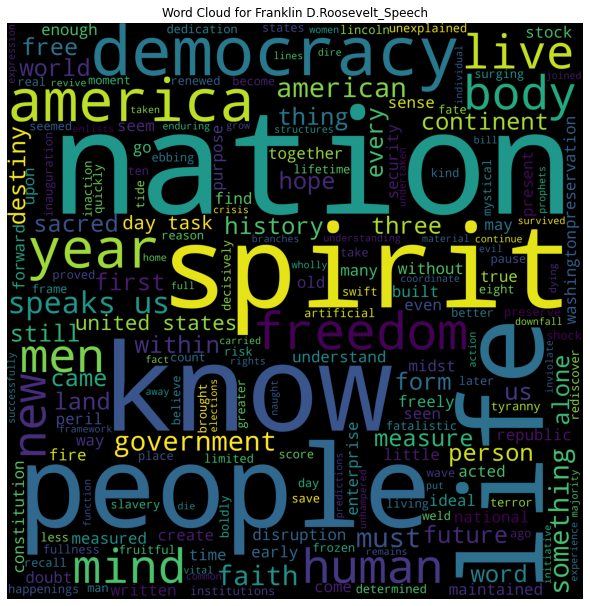

In [158]:
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud_a)
plt.axis('off')
plt.xlabel('Word Cloud')
plt.tight_layout(pad=0)
plt.title('Word Cloud for Franklin D.Roosevelt_Speech')
plt.show()

In [159]:
wordcloud_b=WordCloud(width=3000,height=3000,background_color='black',min_font_size=10,random_state=100).generate(wc_b)

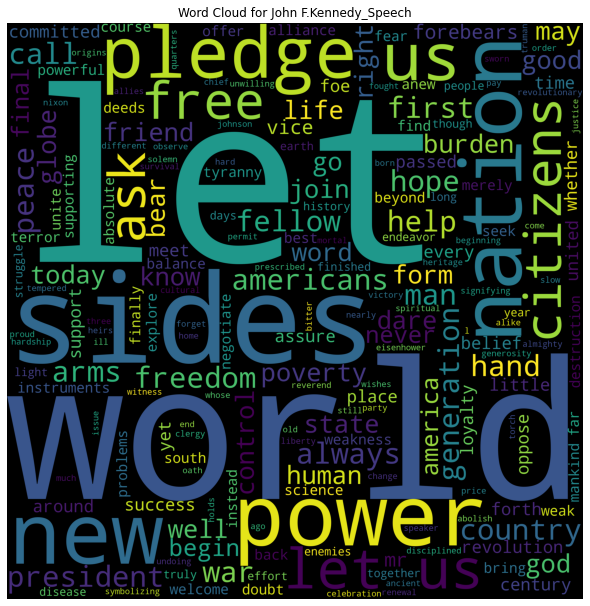

In [160]:
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud_b)
plt.axis('off')
plt.xlabel('Word Cloud')
plt.tight_layout(pad=0)
plt.title('Word Cloud for John F.Kennedy_Speech')
plt.show()

In [161]:
wordcloud_c=WordCloud(width=3000,height=3000,background_color='black',min_font_size=10,random_state=100).generate(wc_c)

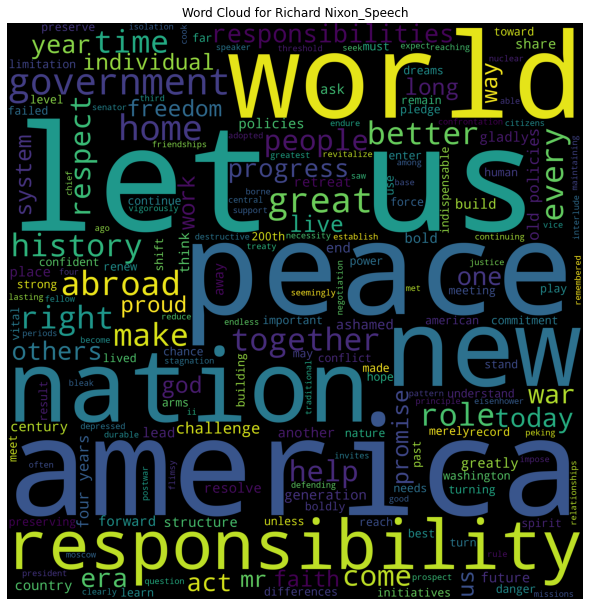

In [162]:
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud_c)
plt.axis('off')
plt.xlabel('Word Cloud')
plt.tight_layout(pad=0)
plt.title('Word Cloud for Richard Nixon_Speech')
plt.show()